In [2]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [3]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [4]:
import sys
sys.path.append('..')
from xDL.models.TabTransformer import TabTransformer
from xDL.models.TabTransformerLSS import TabTransformerLSS

In [5]:
model = TabTransformer(
    data=TITANIC, 
    y="survived",
    output_activation="linear",
    binning_task="classification",
    num_classes=1
    )

--- Preprocessing ---


10it [00:01,  9.40it/s]
9it [00:00, 723.57it/s]


In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics="accuracy")

# Train the model
model.fit(model.training_dataset, epochs=2, validation_data=model.validation_dataset)



Epoch 1/2
1/1 [==============================] - 8s 8s/step - loss: 3.7326 - accuracy: 0.6116 - val_loss: 1.0075 - val_accuracy: 0.5680
Epoch 2/2
1/1 [==============================] - 0s 243ms/step - loss: 0.9513 - accuracy: 0.6036 - val_loss: 0.7323 - val_accuracy: 0.6240


In [7]:
model.summary()

Model: "tab_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tab_transformer_encoder (T  multiple                  144484    
 abTransformerEncoder)                                           
                                                                 
 sequential_4 (Sequential)   (None, 56)                31752     
                                                                 
 dense_10 (Dense)            multiple                  57        
                                                                 
Total params: 176293 (688.64 KB)
Trainable params: 176293 (688.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model = TabTransformerLSS(
    data=TITANIC, 
    y="survived",
    binning_task="classification",
    family = "Logistic"
    )


optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": model.Loss,  "params":None},
    metrics= {"output": "accuracy", "params":None},)

--- Preprocessing ---


0it [00:00, ?it/s]

10it [00:01,  9.87it/s]
9it [00:00, 903.77it/s]


In [9]:
model.fit(
    model.training_dataset, 
    epochs=2, 
    validation_data=model.validation_dataset,
    verbose=1,
)

Epoch 1/2


1/1 [==============================] - 8s 8s/step - loss: 1.2118 - output_loss: 1.2118 - output_accuracy: 0.0000e+00 - val_loss: 1.1676 - val_output_loss: 1.1676 - val_output_accuracy: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 210ms/step - loss: 1.1651 - output_loss: 1.1651 - output_accuracy: 0.0000e+00 - val_loss: 1.0688 - val_output_loss: 1.0688 - val_output_accuracy: 0.0000e+00


--- Preprocessing ---


10it [00:00, 10.67it/s]


2/2 [==============================] - 1s 31ms/step


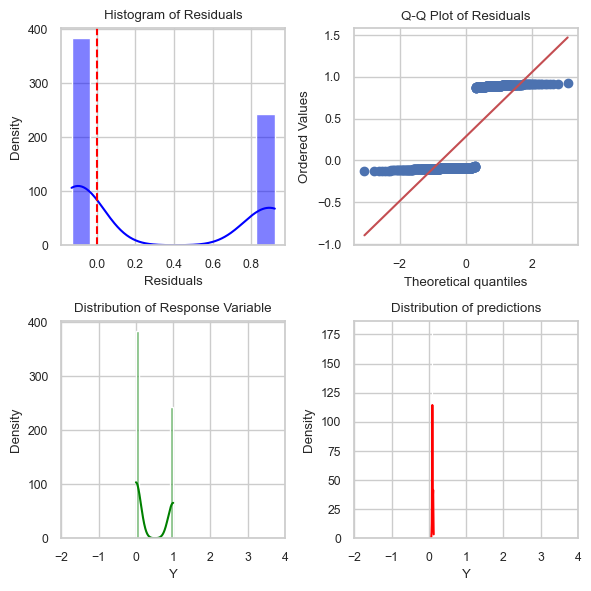

In [10]:
model.plot_analysis()

1/1 [==============================] - 0s 86ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


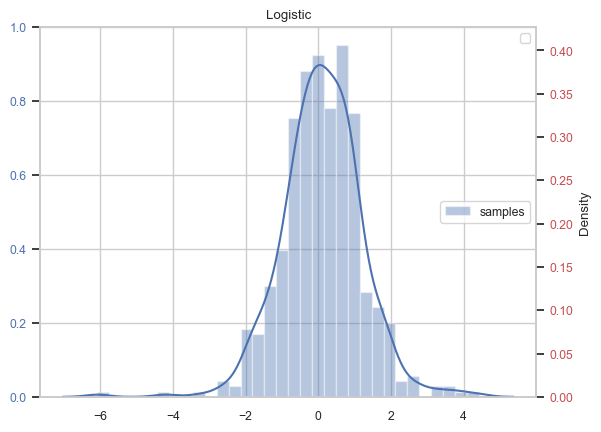

In [11]:
model.plot_dist()